In [2]:
from pathlib import Path
import json

class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        with open(self.file_path, 'r') as file:
            return json.load(file)

file_path = Path(r"C:\udemy\BiztelAI-Assignment\data\BiztelAI_DS_Dataset_Mar25.json")



In [5]:
from pathlib import Path

file_path = Path(r"C:\udemy\BiztelAI-Assignment\app\data\BiztelAI_DS_Dataset_Mar25.json")


In [6]:
file_path = Path("app") / "data" / "BiztelAI_DS_Dataset_Mar25.json"


Note: you may need to restart the kernel to use updated packages.
Dataset shape: (11760, 7)

First 5 entries:


,conv_id,article_url,config,agent,message,sentiment,turn_rating
0,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,agent_1,Did you know that the University of Iowa's loc...,Curious to dive deeper,Good
1,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,agent_2,I think I did hear something about that. I im...,Neutral,Good
2,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,agent_1,"So, it would be in the visiting team's locker ...",Curious to dive deeper,Good
3,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,agent_2,Right. Teams do all kinds of things to bother...,Neutral,Good
4,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,agent_1,"I would hate a cold bench. Then again, I would...",Neutral,Good



Data types:
conv_id          object
article_url      object
config         category
agent            object
message          object
sentiment      category
turn_rating      object
dtype: object

Missing values:
conv_id        0
article_url    0
config         0
agent          0
message        0
sentiment      0
turn_rating    0
dtype: int64


C:\Users\Uthsavi YP\AppData\Local\Temp\ipykernel_8660\747569929.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


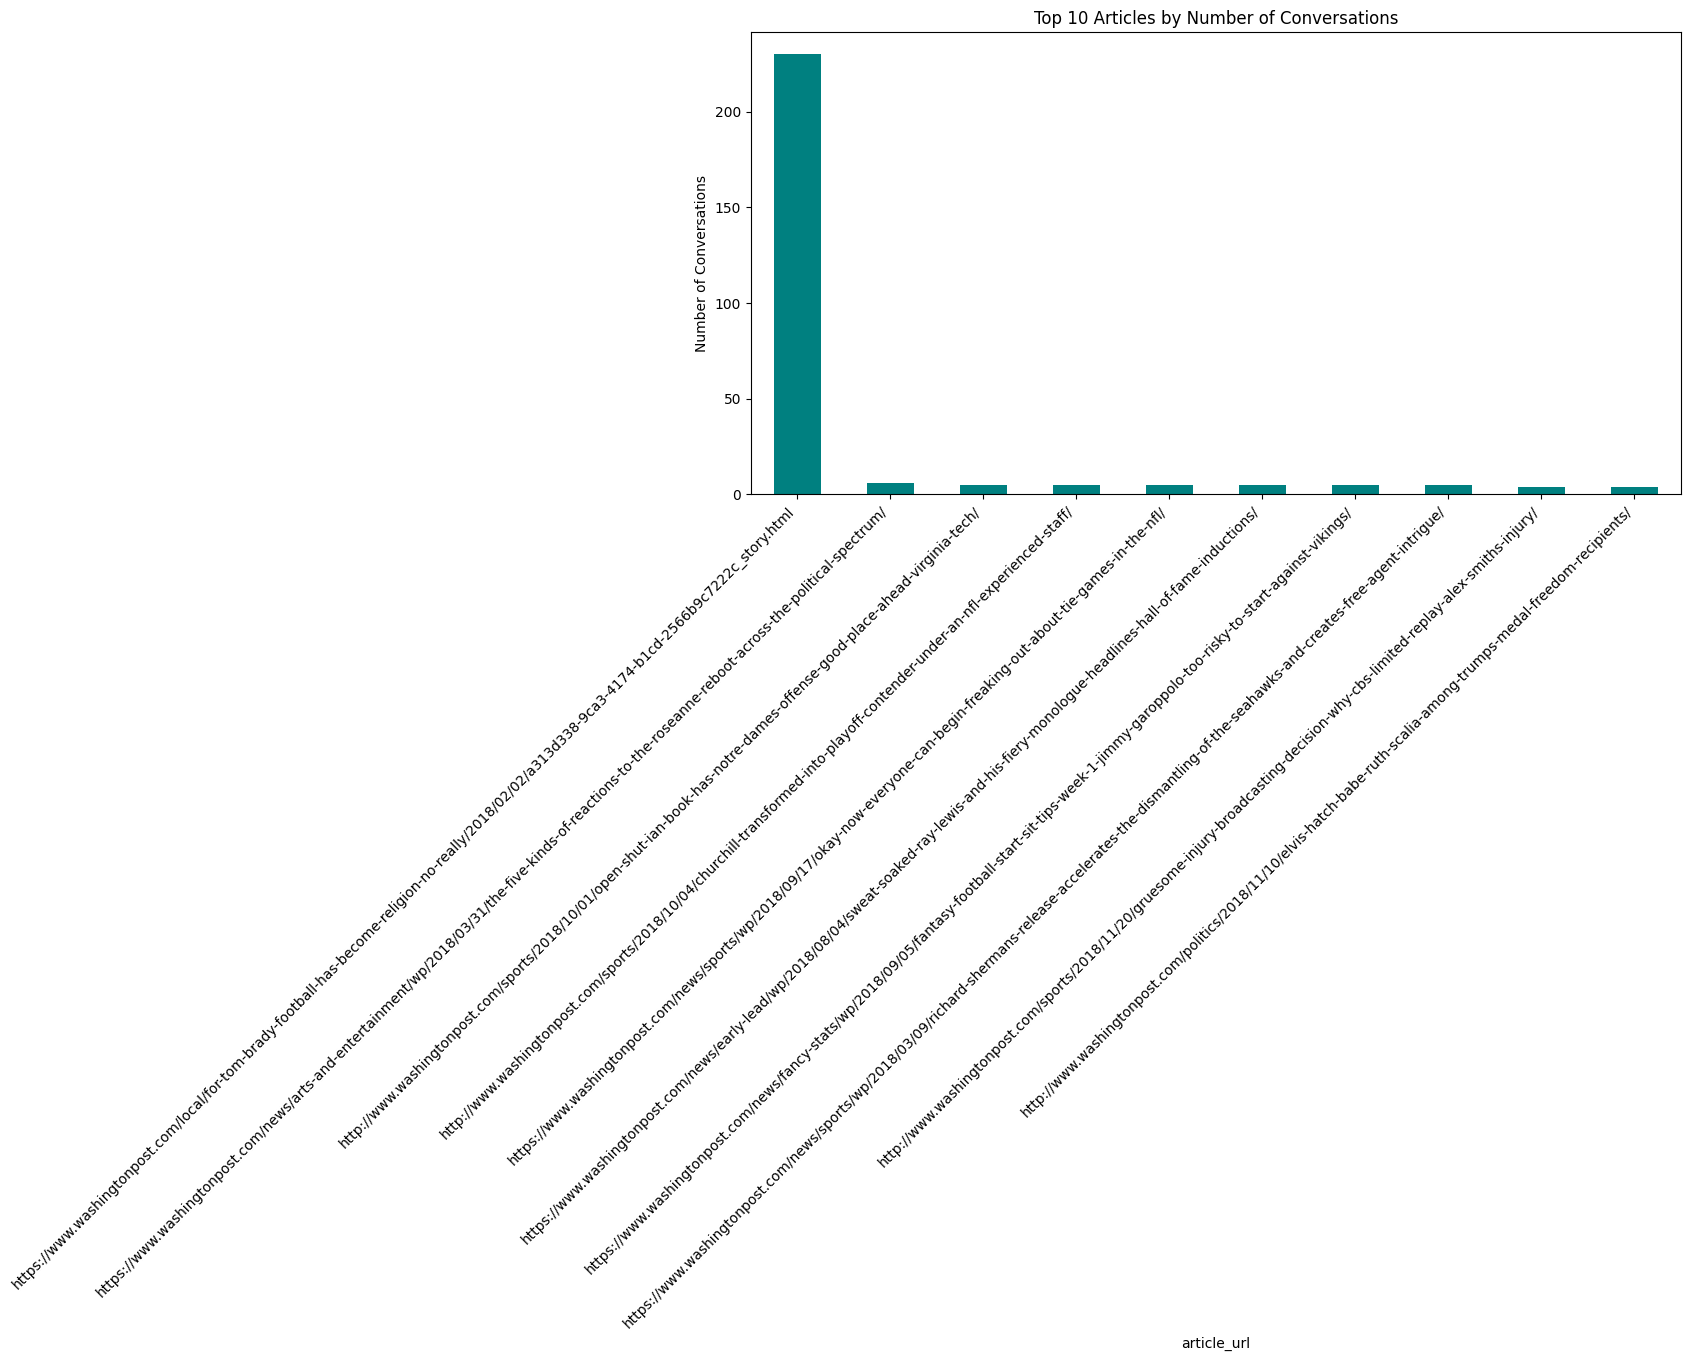

C:\Users\Uthsavi YP\AppData\Local\Temp\ipykernel_8660\747569929.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='agent', data=transformed_data, palette='Set2')


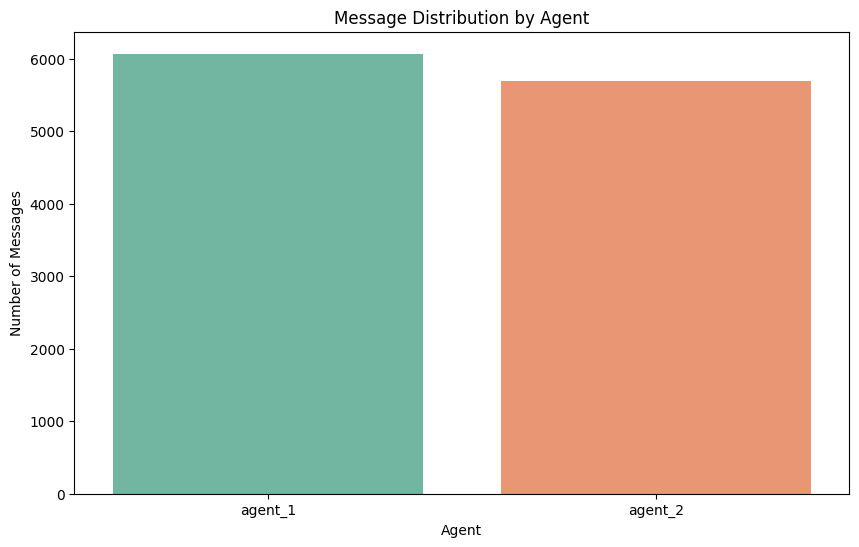

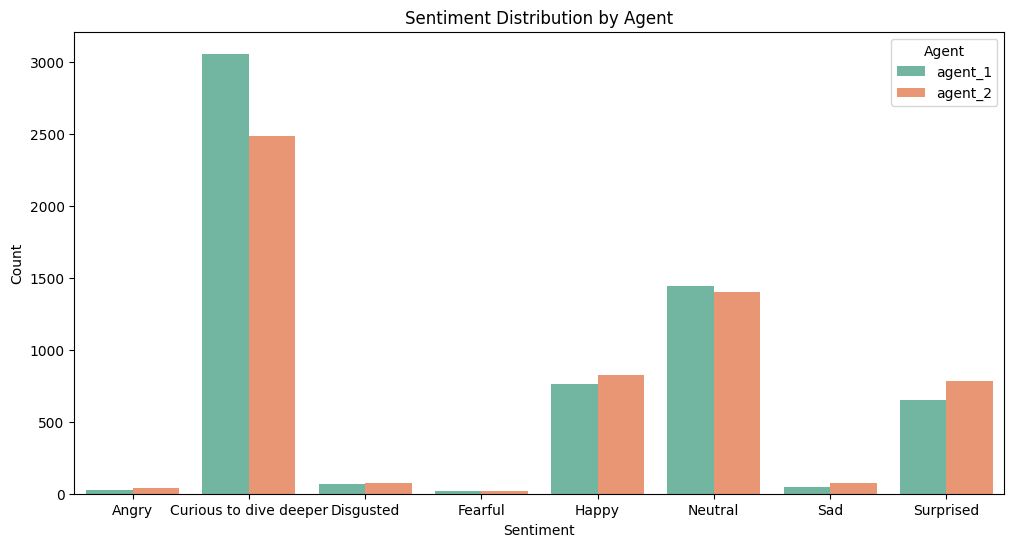

C:\Users\Uthsavi YP\AppData\Local\Temp\ipykernel_8660\747569929.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='turn_rating', data=transformed_data, order=rating_order, palette='viridis')


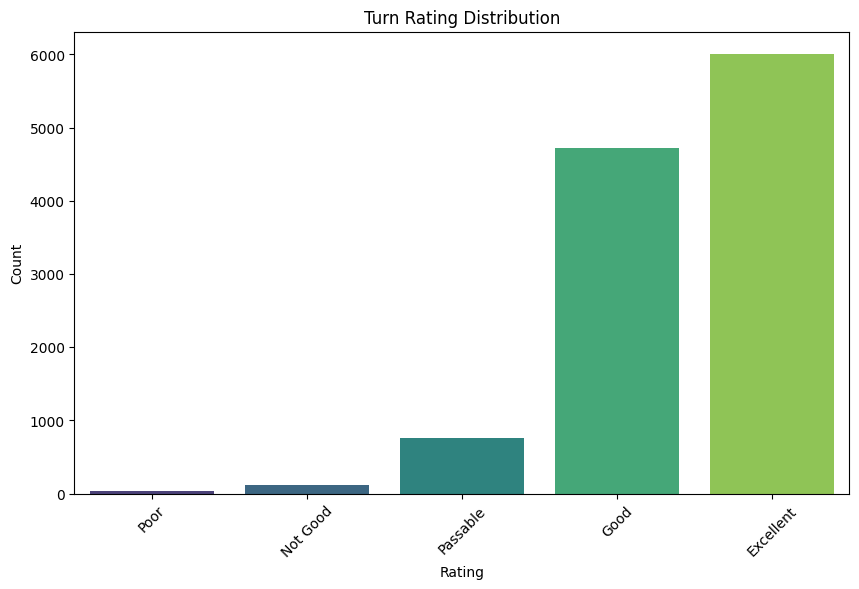

C:\Users\Uthsavi YP\AppData\Local\Temp\ipykernel_8660\747569929.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='config', data=transformed_data, palette='coolwarm')


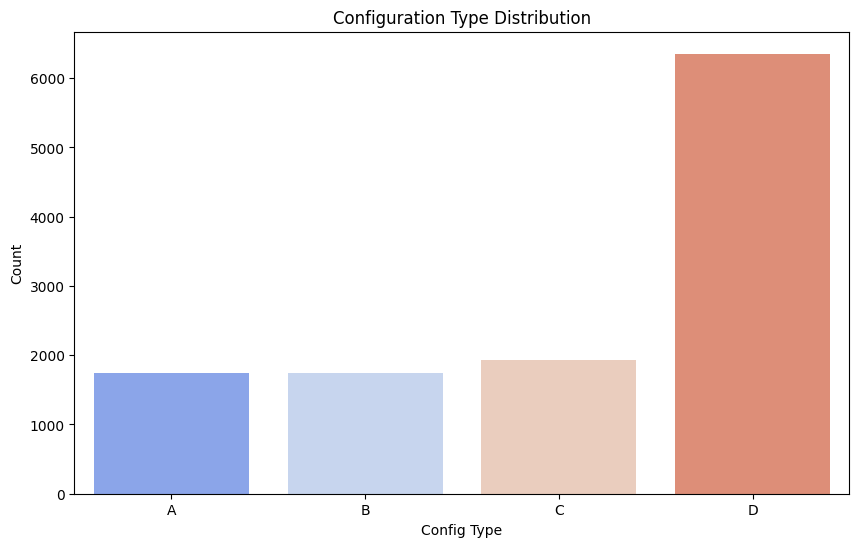

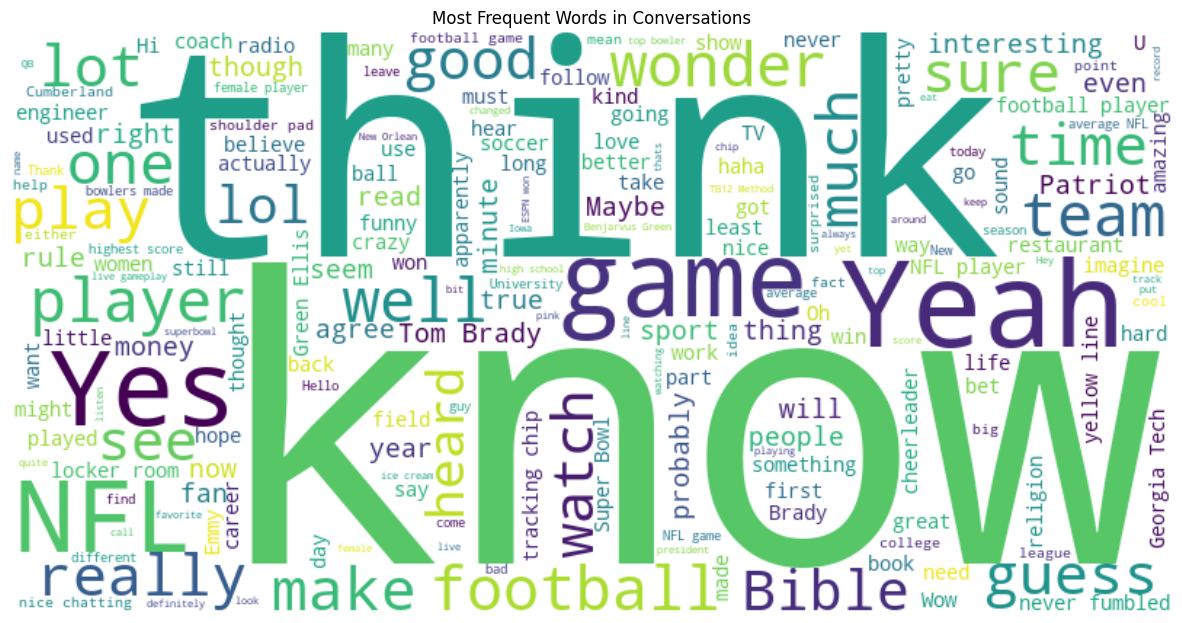

C:\Users\Uthsavi YP\AppData\Local\Temp\ipykernel_8660\747569929.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in word_freq],


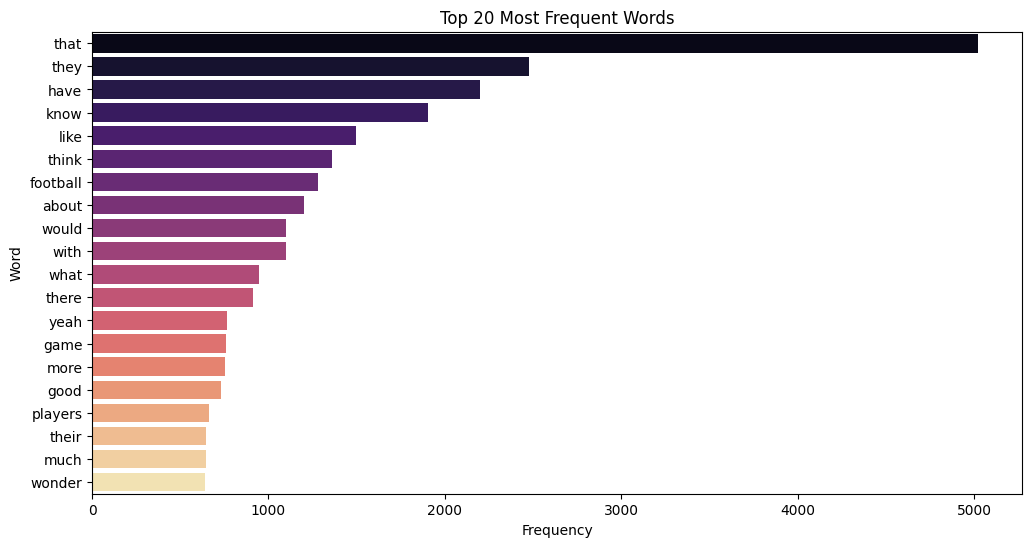

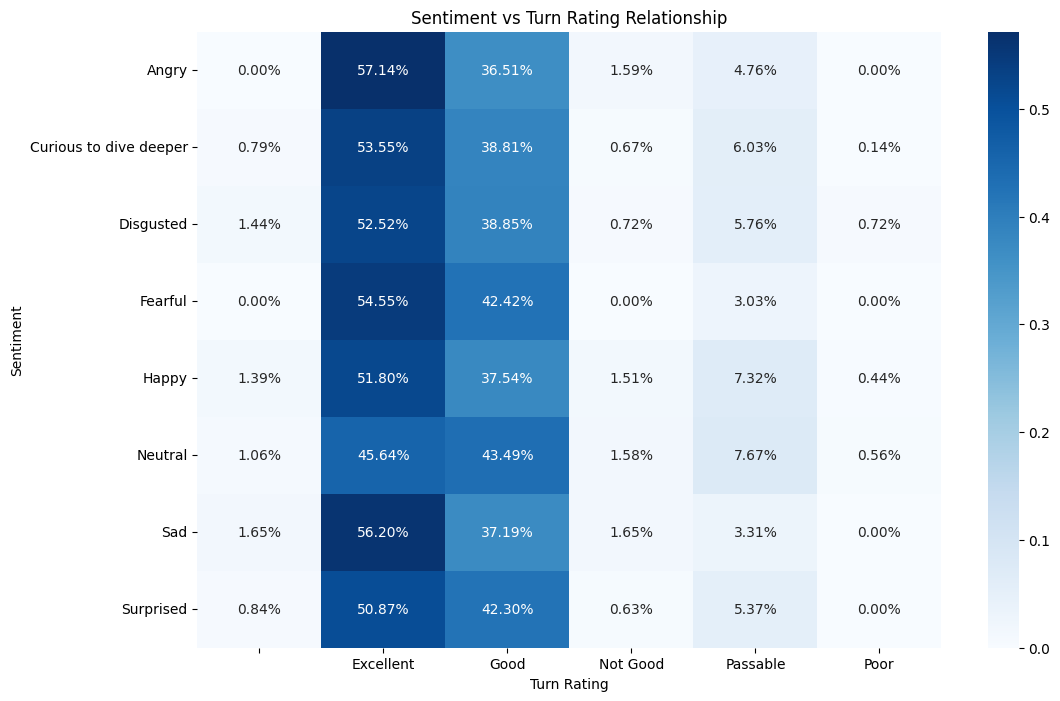

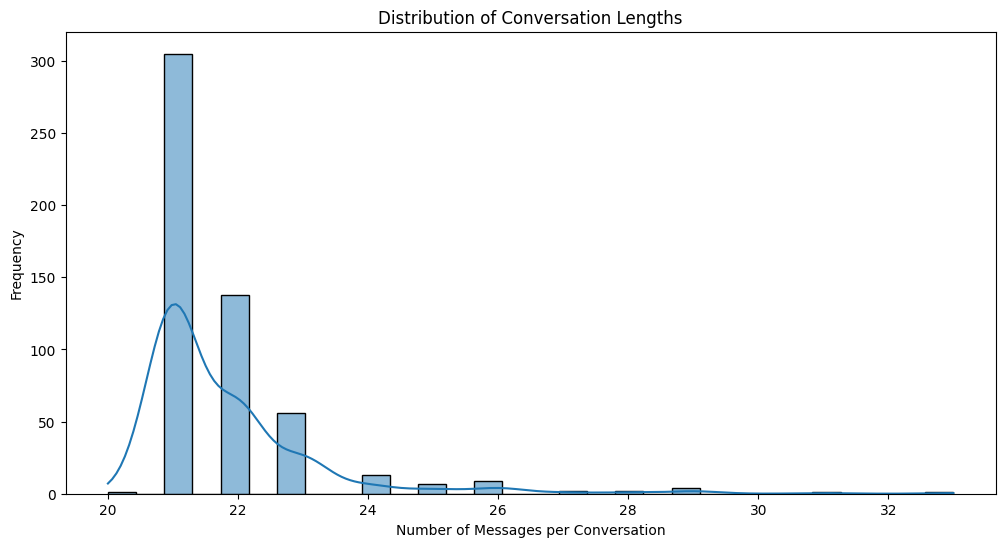

In [6]:
# %% [markdown]
# # Exploratory Data Analysis
# ## BiztelAI Chat Transcript Analysis

# %%
%pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load data processing classes
import sys
sys.path.append("..")
from app.data_pipeline import DataLoader, DataCleaner, DataTransformer

# %%
# Initialize data pipeline
from pathlib import Path

file_path = Path(r"C:\udemy\BiztelAI-Assignment\app\data\BiztelAI_DS_Dataset_Mar25.json")
raw_data = DataLoader(file_path).load_data()
df = DataCleaner(raw_data).clean()
transformed_data = DataTransformer(df).transform()

# %% [markdown]
# ## Basic Dataset Overview

# %%
print("Dataset shape:", transformed_data.shape)
print("\nFirst 5 entries:")
display(transformed_data.head())

# %%
print("\nData types:")
print(transformed_data.dtypes)

# %%
print("\nMissing values:")
print(transformed_data.isnull().sum())

# %% [markdown]
# ## Conversation Analysis

# %%
# Conversations per article
plt.figure(figsize=(12,6))
article_counts = transformed_data.groupby('article_url')['conv_id'].nunique().sort_values(ascending=False)
article_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Articles by Number of Conversations')
plt.ylabel('Number of Conversations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Agent Behavior Analysis

# %%
# Message distribution by agent
plt.figure(figsize=(10,6))
sns.countplot(x='agent', data=transformed_data, palette='Set2')
plt.title('Message Distribution by Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Messages')
plt.show()

# %%
# Sentiment analysis
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', hue='agent', data=transformed_data, palette='Set2')
plt.title('Sentiment Distribution by Agent')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Agent')
plt.show()

# %% [markdown]
# ## Conversation Quality Analysis

# %%
# Turn rating distribution
plt.figure(figsize=(10,6))
rating_order = ['Poor', 'Not Good', 'Passable', 'Good', 'Excellent']
sns.countplot(x='turn_rating', data=transformed_data, order=rating_order, palette='viridis')
plt.title('Turn Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# %%
# Configuration type analysis
plt.figure(figsize=(10,6))
sns.countplot(x='config', data=transformed_data, palette='coolwarm')
plt.title('Configuration Type Distribution')
plt.xlabel('Config Type')
plt.ylabel('Count')
plt.show()

# %% [markdown]
# ## Text Analysis

# %%
# Generate word cloud
all_text = ' '.join(transformed_data['message'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

# %%
# Top 20 common words
words = [word for text in transformed_data['message'].dropna().str.lower() 
         for word in text.split() if len(word) > 3]
word_freq = Counter(words).most_common(20)

plt.figure(figsize=(12,6))
sns.barplot(x=[count for word, count in word_freq], 
            y=[word for word, count in word_freq], 
            palette='magma')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# %% [markdown]
# ## Advanced Insights

# %%
# Sentiment vs turn rating heatmap
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(transformed_data['sentiment'], 
                       transformed_data['turn_rating'],
                       normalize='index')
sns.heatmap(cross_tab, annot=True, fmt='.2%', cmap='Blues')
plt.title('Sentiment vs Turn Rating Relationship')
plt.xlabel('Turn Rating')
plt.ylabel('Sentiment')
plt.show()

# %%
# Conversation length analysis
conv_lengths = transformed_data.groupby('conv_id').size()

plt.figure(figsize=(12,6))
sns.histplot(conv_lengths, bins=30, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Messages per Conversation')
plt.ylabel('Frequency')
plt.show()